# Prep

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings; warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('../data/apostas_info.csv', index_col=0)

,company_name,brazilian_visitors,hq_country,bounce_rate,visit_duration,male,female,18-24,25-34,35-44,45-54,55-64,65+
0,mansion.com,-1,Gibraltar,0.828,0.0,0.640,0.360,0.223,0.295,0.193,0.135,0.093,0.061
1,worldsportsbetting.co.za,-1,South Africa,0.262,16.0,0.665,0.335,0.239,0.333,0.201,0.117,0.063,0.048
2,merrybet.com,-1,Nigeria,0.165,12.0,0.728,0.272,0.164,0.343,0.220,0.138,0.085,0.049
3,sunbet.co.za,2932,South Africa,0.445,11.0,0.563,0.437,0.174,0.295,0.191,0.149,0.103,0.088
4,queenvegas.com,-1,Malta,0.120,3.0,0.567,0.433,0.153,0.305,0.202,0.160,0.111,0.070


In [89]:
df_poker = pd.read_csv('../data/poker_info.csv', index_col=0)

,company_name,brazilian_visitors,hq_country,bounce_rate,visit_duration,male,female,18-24,25-34,35-44,45-54,55-64,65+
0,amaya.biz,-1,United Kingdom,0.114,3.0,0.578,0.422,0.160,0.289,0.229,0.147,0.101,0.072
1,amaya.biz,-1,United Kingdom,0.114,2.0,0.578,0.422,0.161,0.289,0.229,0.147,0.102,0.072
2,toppokervalue.com,-1,- -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,segurobet.com,78600,- -,0.177,15.0,0.528,0.472,0.279,0.346,0.180,0.104,0.065,0.027
4,pokerexpertguide.com,-1,- -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df = pd.concat([df, df_poker], ignore_index=True)
df.shape

(835, 13)

In [91]:
df.hq_country = df.hq_country.replace('- -', 'No info')

In [93]:
df = df.drop_duplicates()

In [97]:
df.head()

,company_name,brazilian_visitors,hq_country,bounce_rate,visit_duration,male,female,18-24,25-34,35-44,45-54,55-64,65+
0,mansion.com,-1,Gibraltar,0.828,0.0,0.640,0.360,0.223,0.295,0.193,0.135,0.093,0.061
1,worldsportsbetting.co.za,-1,South Africa,0.262,16.0,0.665,0.335,0.239,0.333,0.201,0.117,0.063,0.048
2,merrybet.com,-1,Nigeria,0.165,12.0,0.728,0.272,0.164,0.343,0.220,0.138,0.085,0.049
3,sunbet.co.za,2932,South Africa,0.445,11.0,0.563,0.437,0.174,0.295,0.191,0.149,0.103,0.088
4,queenvegas.com,-1,Malta,0.120,3.0,0.567,0.433,0.153,0.305,0.202,0.160,0.111,0.070


In [99]:
df.visit_duration = pd.to_datetime(df.visit_duration, format='%M')

In [28]:
df = df.dropna()

In [101]:
df_brazil = df[df.brazilian_visitors != -1]

# Análise de empresas relevantes no Brasil (Brasil no top 5 acessos)

## Número de empresas

In [66]:
print(f'O Brasil está no top 5 acessos mensais de {df_brazil.shape[0]} empresas do segmento')

O Brasil está no top 5 acessos mensais de 41 empresas do segmento


## Acessos mensais

In [38]:
print(f'Número de visitantes mensais no Brasil: {df_brazil.brazilian_visitors.sum()/1_000_000:.2f}M')

Número de visitantes mensais no Brasil: 125.41M


## Países sede

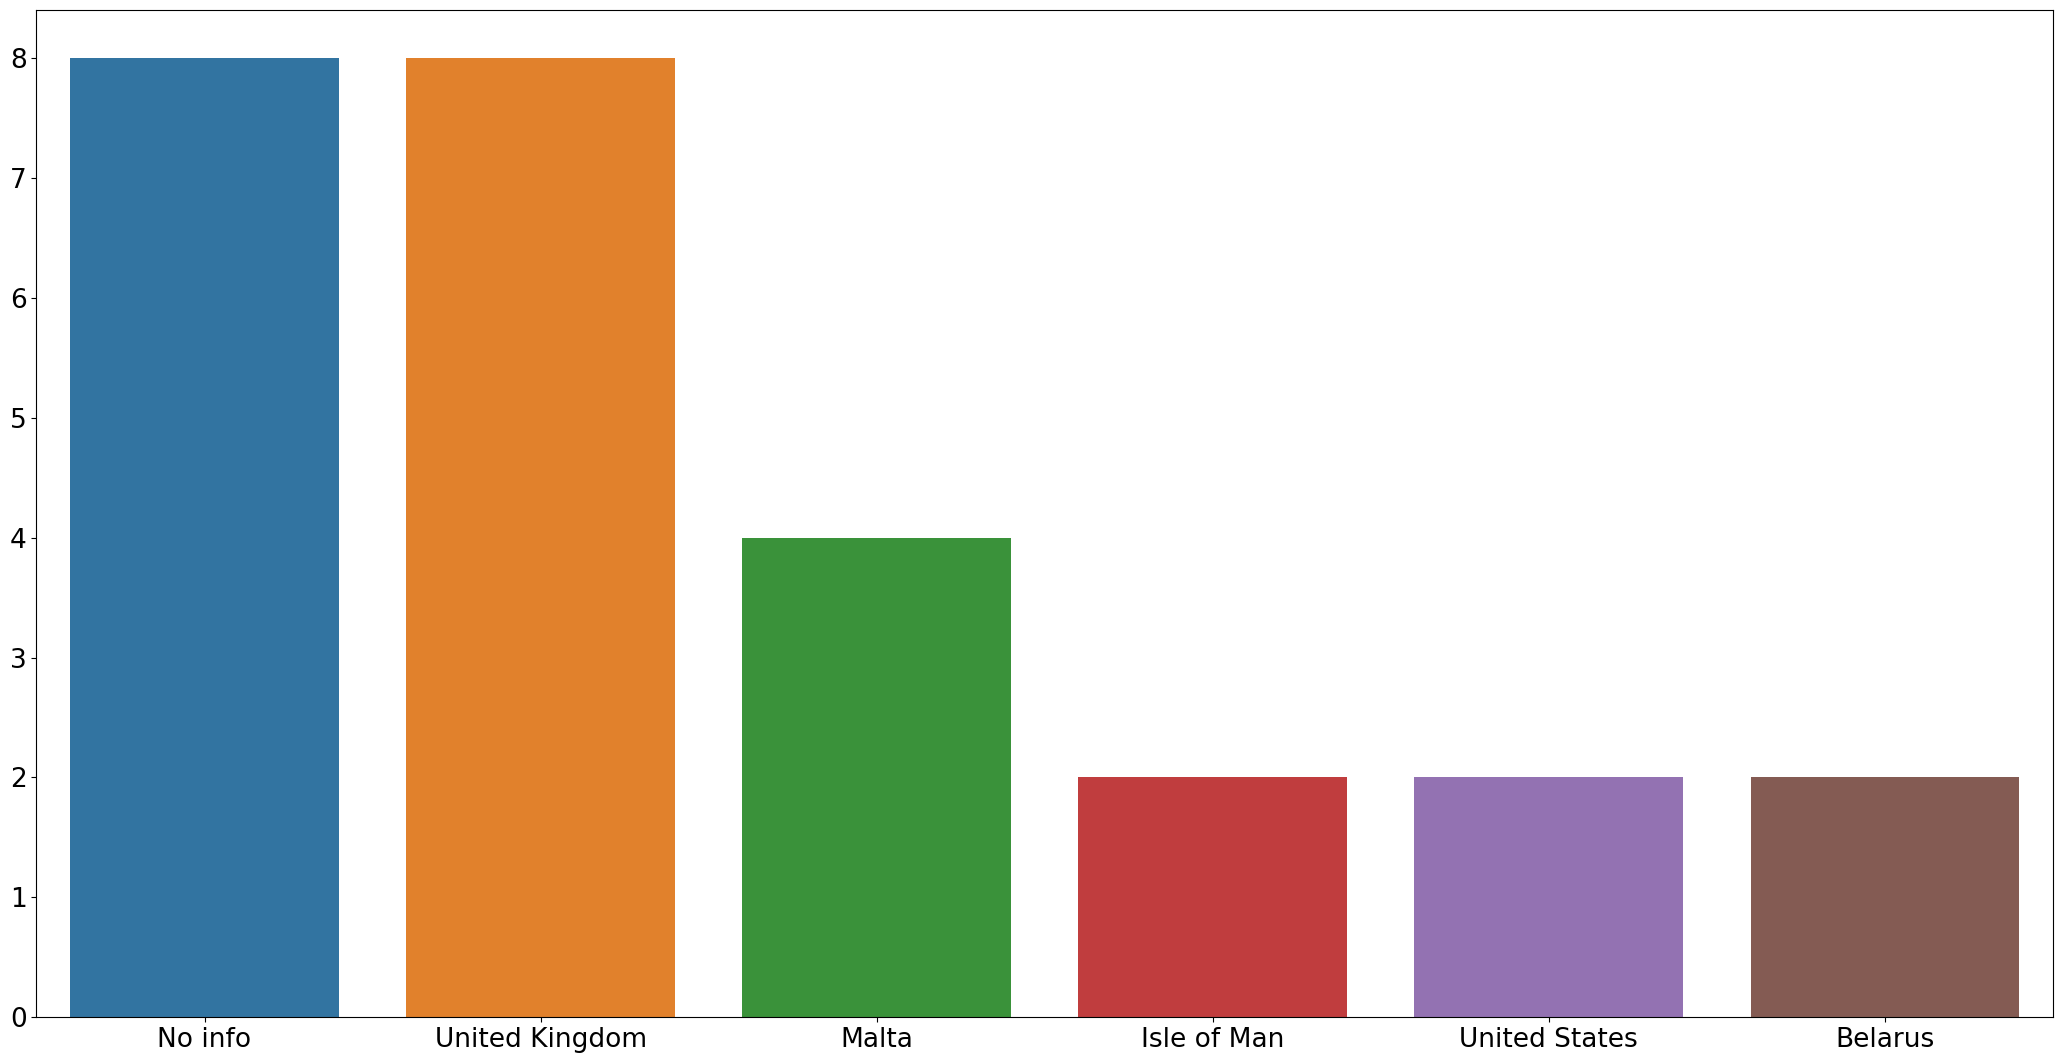

In [128]:
top_countries = df_brazil.hq_country.value_counts()[:6]
bot_countries = df_brazil.hq_country.value_counts()[6:]

plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=top_countries.keys(), y=top_countries.values)
plt.tight_layout();

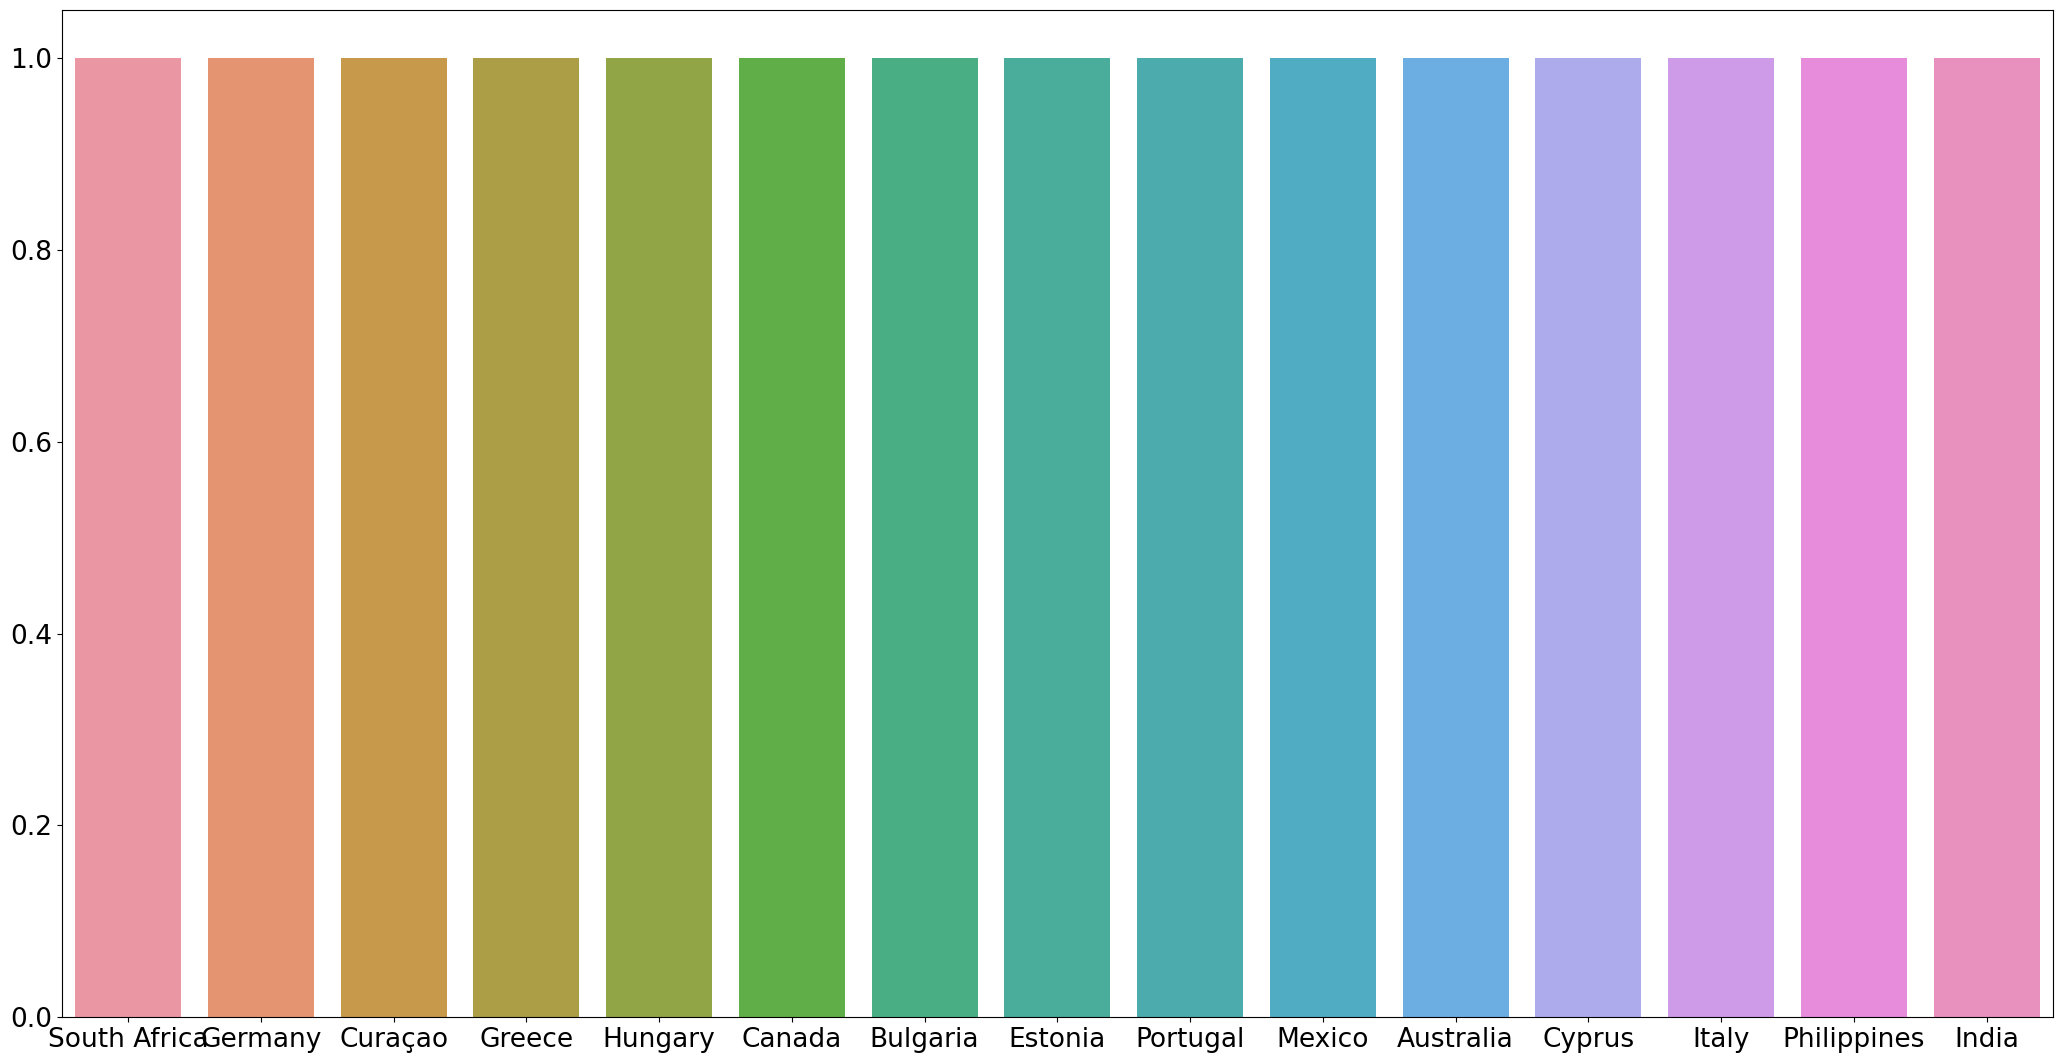

In [129]:
plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=bot_countries.keys(), y=bot_countries.values)
plt.tight_layout();

## Qualidade da visita

In [119]:
bounce = df_brazil.bounce_rate.mean() * 100
visit_dur = df_brazil.visit_duration.mean().time()

print(f'A taxa de bounce rate no segmento é em média {bounce:.2f}%')
print(f'O tempo médio de visita no segmento é de {visit_dur.minute}:{visit_dur.second}')

A taxa de bounce rate no segmento é em média 49.21%
O tempo médio de visita no segmento é de 5:55


## Demografia

### Sexo

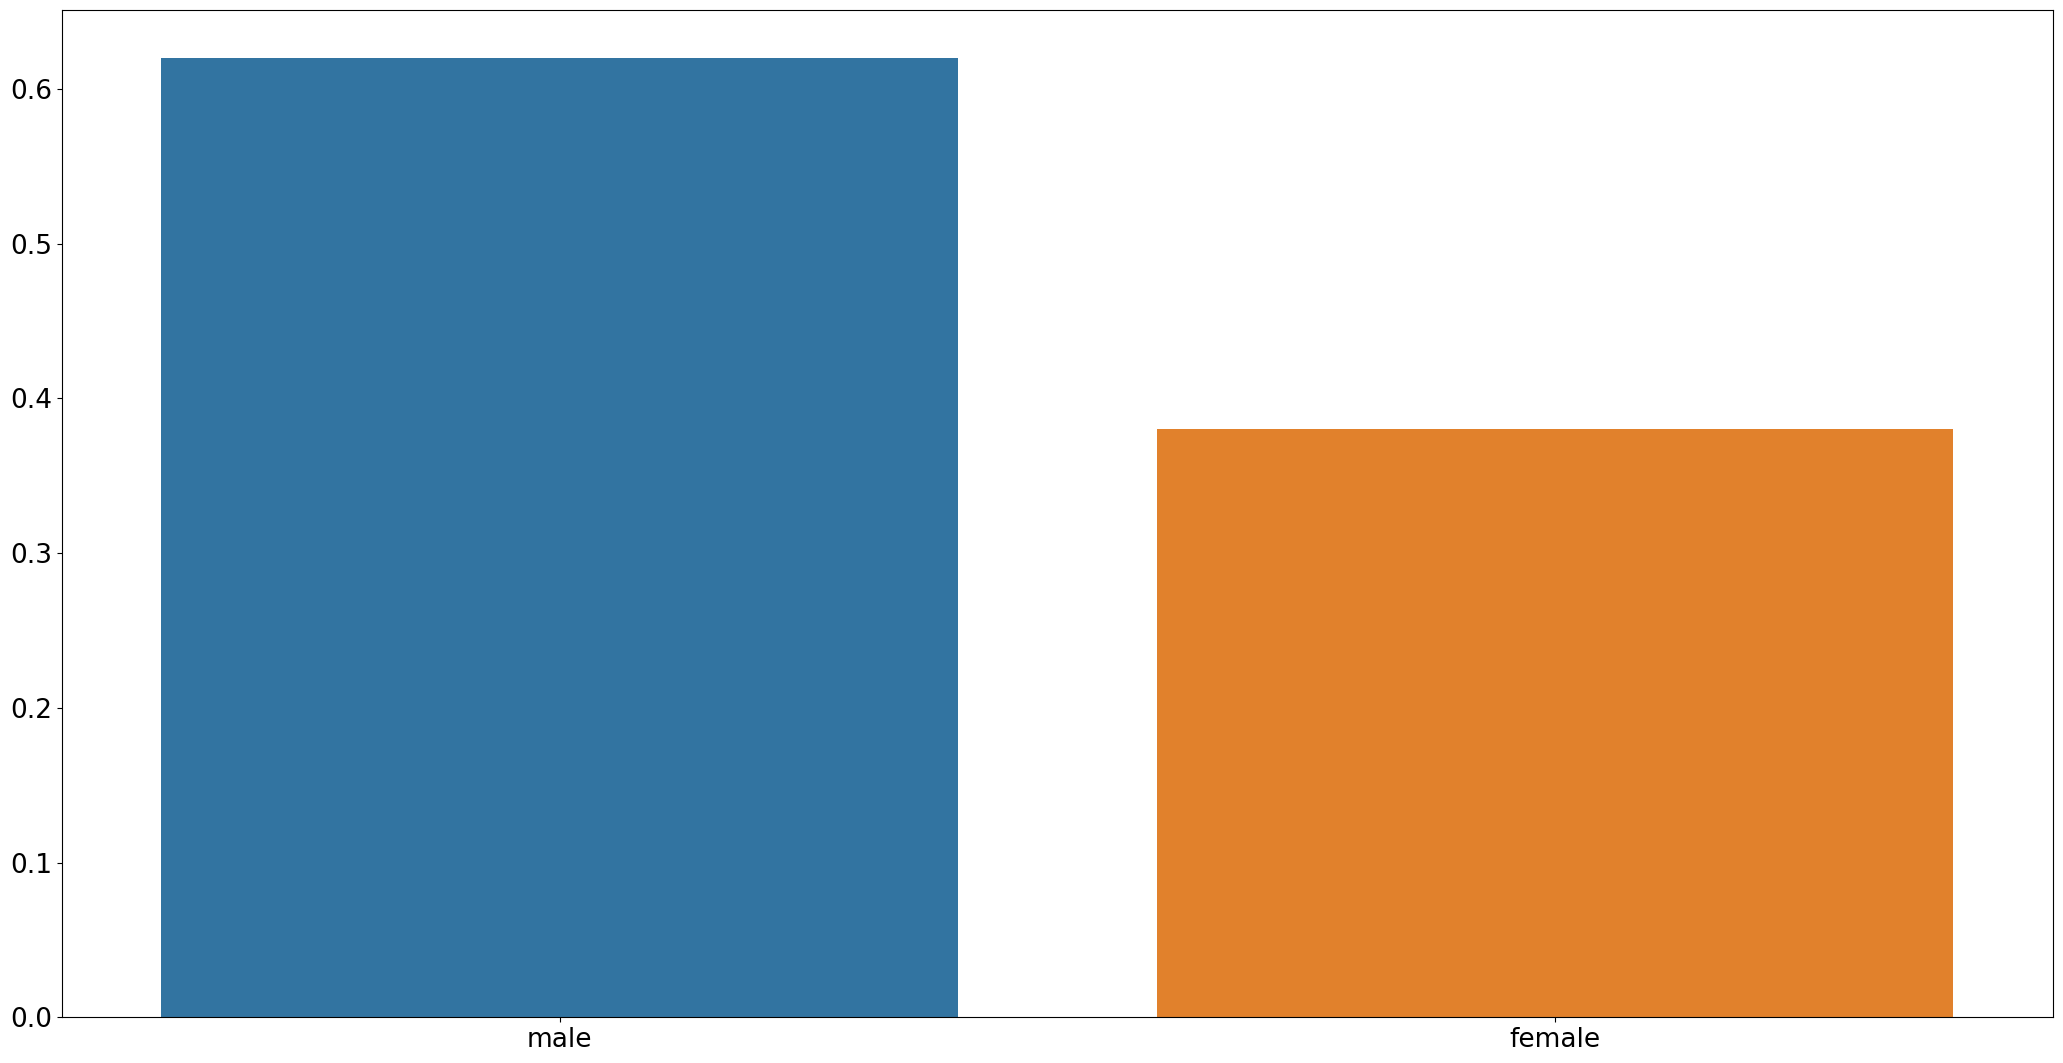

In [127]:
male = round(df_brazil.male.mean(), 2)
female = 1 - male

plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=['male', 'female'], y=[male, female])
plt.tight_layout();

### Idade

In [143]:
age_buckets = df_brazil.columns[-6:]
idade = df_brazil[age_buckets]
media_idade = idade.mean()

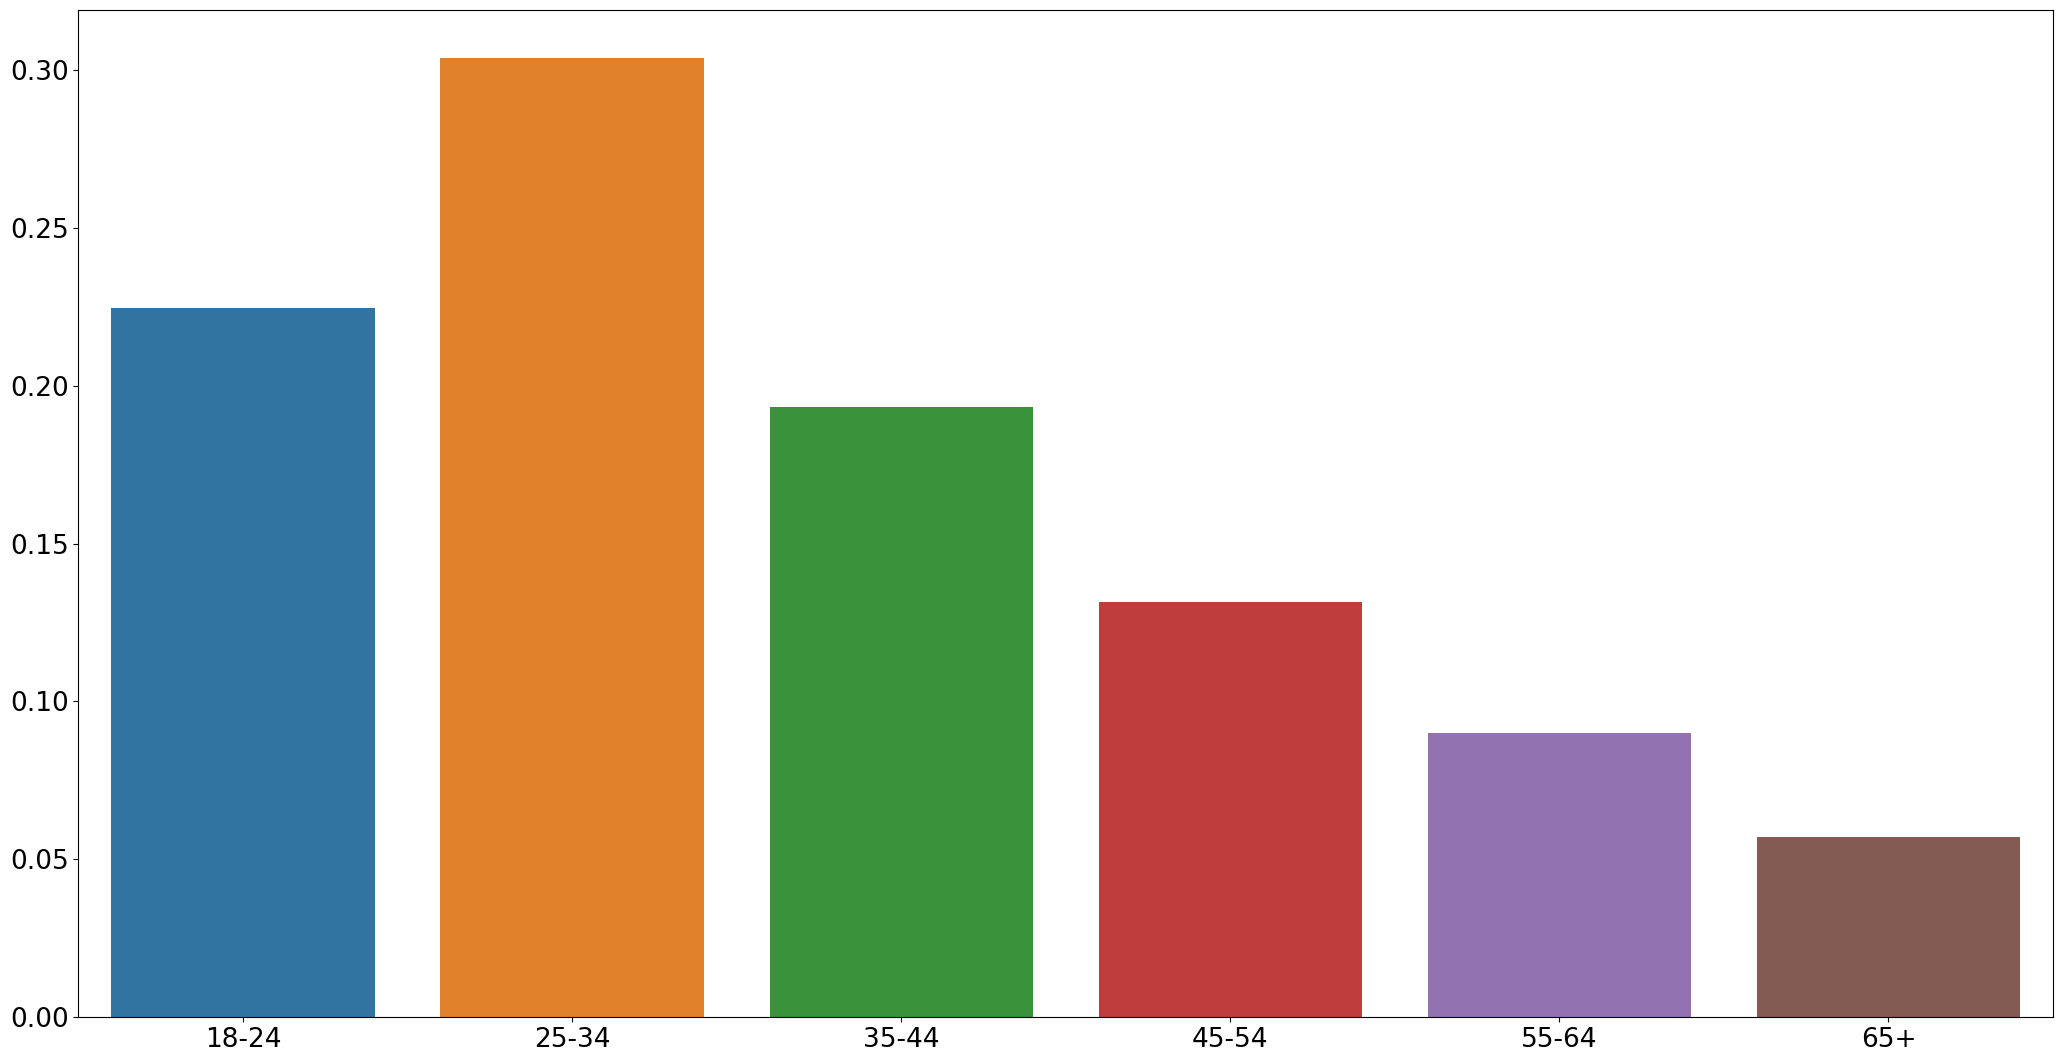

In [144]:
plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=media_idade.index, y=media_idade.values)
plt.tight_layout();